In [1]:
# Warming Models
'''
solar constant SWR = 1366 W/m^2 (at equator)
surface albedo ~= 30% (global average)
infrared radiationm heat loss = sigma * T^4 (Boltzmann law)

'''

import numpy as np

#Radiation balance assuming no Greenhouse effect

solar_constant = 1366
albedo = 0.3
boltzmann_constant = 5.6703744193e-8

Te = (solar_constant*(1-albedo) / (4*boltzmann_constant))**(1/4)
print('Average Earth Temp: %0.4f K, %0.4f C' % (Te, Te-273.15))
print('TOO COLD!')

Average Earth Temp: 254.8116 K, -18.3384 C
TOO COLD!


In [2]:
# use greenhouse effect:
'''
E = emmissivity ~= 78% (0% = no greenhouse effect)
Ta = tempof atmosphere
E * sigma * Ta^4 + (1-E)*sigma * Ta^4 = 0
'''

epsilon = 0.78

Ts = ((solar_constant*(1-albedo)/4) / (boltzmann_constant * (1-epsilon/2))) ** (1/4)
print('Average Earth Temp: %0.4f K, %0.4f C' % (Ts, Ts-273.15))

Average Earth Temp: 288.3280 K, 15.1780 C


In [3]:
# model added CO2
# doubling of C02 = Radiative forcing of 4
Ta = (epsilon * boltzmann_constant * Ts**4 / (2 * boltzmann_constant)) ** (1/4)
d_epsilon = -4 / (boltzmann_constant * Ta**4 - boltzmann_constant * Ts**4)
d_epsilon

0.01673290106672244

In [4]:
new_epsilon = epsilon + d_epsilon
new_epsilon

0.7967329010667225

In [5]:
Ts_new = ((solar_constant*(1-albedo)/4) / (boltzmann_constant * (1-new_epsilon/2))) ** (1/4) 
# blah blah ne formula results in +1 degree warming.. but should be 3! does not account for feedback loops
print(Ts_new - Ts)

0.9972030490922066


In [6]:
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [8]:
# Time dependance
M = 1
u = np.zeros((M,))
heat_C = 4.0e8 # Heat Capacity = J/m2/K

def myfunc(t, u): # heat balance function w/out GH effect
    f = np.zeros((M,))
    f[0] = (solar_constant*(1-albedo)/4 - boltzmann_constant*(u[0]**4)) / heat_C
    return f

u0 = np.zeros((M,))
t0 = 0.0
dt = 60*60*365*24 # one year in seconds (to keep SI units)
tmax = 100*dt
t = np.arange(t0, tmax, dt)
N = np.shape(t)[0]


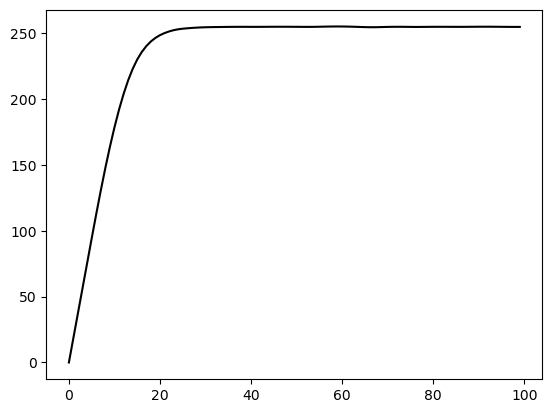

In [9]:
sol = solve_ivp(myfunc, [t0,tmax], u0, method='RK45', t_eval = t)

fig = plt.figure()
plt.plot(sol.t/(60*60*365*24), sol.y[0], 'k-')
#lt.xlabel('Time (Year)')
#plt.ylabel('Temperat#ure (K)')



In [10]:
# with GHG absorption

M = 2

def myfunc(t, u): # heat balance function w/ 2 layer model GHG effect
    f = np.zeros((M,))
    # u[0] = Ta (Temp Atmosphere)
    # u[1] = Ts (Temp Surface)
    
    f[0] = (solar_constant*(1-albedo)/4 - epsilon*boltzmann_constant*(u[0]**4) 
            - (1 - epsilon) * boltzmann_constant*(u[1]**4)) / heat_C
    f[1] = (solar_constant*(1-albedo)/4 + epsilon*boltzmann_constant*(u[0]**4)
            - boltzmann_constant*(u[1]**4)) / heat_C
    return f
    



In [21]:
# Initial conditions

#u0 = np.zeros((M,)) # init Temp, 1D array
u0 = [120, 150] # init Temp, 1D array

dt = 365*24*60*60  # time step = one year (in seconds)
t0 = 0
tmax = 100 * dt
t= np.arange(t0, tmax, dt)
N = np.shape(t)

sol = solve_ivp(myfunc, [t0, tmax], u0, method='RK45', t_eval=t)
print(sol.y[1])


[150.         166.97114758 183.16681041 198.42982232 212.60548346
 225.54821704 237.13656107 247.2855601  255.96969916 263.21138515
 269.0816043  273.80239216 277.55739374 280.467227   282.61943013
 284.22156425 285.40441548 286.2651345  286.88293225 287.32887174
 287.66569941 287.90085134 288.04668213 288.12504241 288.16727886
 288.2119222  288.25802833 288.29324388 288.31436804 288.3213566
 288.31732195 288.30853305 288.30441545 288.31039237 288.31583159
 288.32019808 288.32361801 288.3261955  288.32801259 288.32912927
 288.32958347 288.32939103 288.32854576 288.32701938 288.31815331
 288.28234176 288.23506173 288.19176405 288.16388019 288.15882231
 288.17998323 288.22673644 288.29443613 288.37441712 288.45399495
 288.51646578 288.54110648 288.50479067 288.4421203  288.38329823
 288.33463736 288.30044041 288.28299986 288.28259803 288.297507
 288.32398868 288.35629475 288.38666671 288.40533585 288.422835
 288.47684855 288.5276474  288.54500552 288.51420079 288.43601499
 288.32673378 2

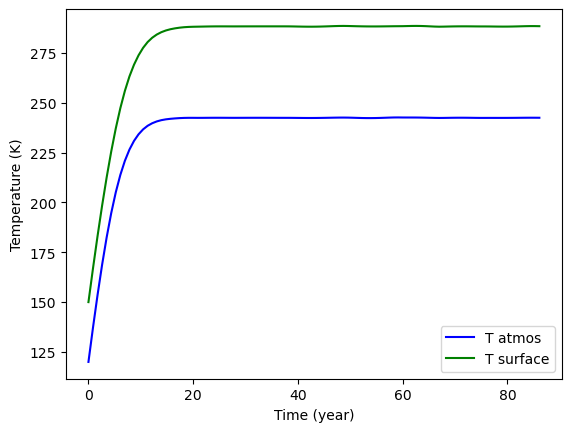

In [22]:
fig = plt.figure()
plt.plot(sol.t / (365*24*60*69), sol.y[0], 'b-', label='T atmos')
plt.plot(sol.t / (365*24*60*69), sol.y[1], 'g-', label='T surface')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')
plt.legend()